In [2]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from nltk.corpus import stopwords 
from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import joblib 
import pickle

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\feras\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\feras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\feras\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
data= pd.read_csv("./dataset/kaggleDataset/sqliv2/sqliv2.csv",encoding='utf-16')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33761 entries, 0 to 33760
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  33757 non-null  object
 1   Label     33761 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 527.6+ KB


In [5]:
data.head()

,Sentence,Label
0,NaN,1
1,""" or pg_sleep ( __TIME__ ) --",1
2,create user name identified by pass123 tempora...,1
3,%29,1
4,' AND 1 = utl_inaddr.get_host_address ( ( S...,1


# Data Preprocessing

Word Count with CountVectorizer
1. crerate an instance of the CountVectorizer class.
2. call the fit() function in order to learn a vocabulary from one or more documents.
3. call the transform() function on one more document as needed to encode each as a vector.

In [8]:
#create the transform
vectorizer = CountVectorizer(min_df=2, max_df=0.7, stop_words=stopwords.words('english')) 
# tokenize(fit) and build vocab 
vectorizer.fit(data['Sentence'].values.astype('U')) # .astype('U') -> convert to Unicode   
print(vectorizer.vocabulary_) 
#encode document(transform)
vector= vectorizer.transform(data['Sentence'].values.astype('U'))
posts= vector.toarray()

{'nan': 7515, 'pg_sleep': 8021, '__time__': 3372, 'create': 4935, 'user': 9918, 'name': 7512, 'identified': 6405, 'pass123': 7901, 'temp': 9577, 'users': 9922, '29': 862, 'utl_inaddr': 9932, 'get_host_address': 6035, 'select': 8976, 'distinct': 5222, 'table_name': 9497, 'rownum': 8777, 'limit': 6953, 'sys': 9472, 'all_tables': 3576, 'id': 6400, 'union': 9876, 'version': 10003, 'syscolumns': 9481, 'sysobjects': 9484, 'load_file': 6994, 'char': 4512, '47': 1502, '101': 34, '116': 111, '99': 3342, '112': 95, '97': 3276, '115': 107, '119': 127, '100': 23, 'admin': 3448, 'column_name': 4692, 'all_tab_columns': 3575, 'wapiti': 10122, 'ascii': 3785, 'lower': 7042, 'substring': 9395, 'top': 9703, 'xtype': 10258, 'insert': 6517, 'password': 7911, '26': 753, '27': 789, 'null': 7650, 'banner': 3932, 'print': 8247, 'sa': 8812, 'waitfor': 10105, 'delay': 5092, '4039': 1267, '41': 1287, '2b': 899, 'declare': 5069, 'varchar': 9967, '200': 537, 'benchmark': 4042, '10000000': 25, 'md5': 7227, 'sleep': 

max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:

    max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
    max_df = 25 means "ignore terms that appear in more than 25 documents"
    
min_df is used for removing terms that appear too infrequently. For example:

    min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
    min_df = 5 means "ignore terms that appear in less than 5 documents".


In [9]:
print(vector.shape)
print(type(vector))
print(posts) #print the encoded vectors

(33761, 10321)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


we have 33761 vectors (samples) and each one has 10321 words (features) (each word will be represented by 0 or 1)

In [9]:
transformed_posts=pd.DataFrame(posts)
df=pd.concat([data,transformed_posts],axis=1)
X=df[df.columns[2:]]
y=df['Label']

In [11]:
df.head()

,Sentence,Label,0,1,2,3,4,5,6,7,...,10311,10312,10313,10314,10315,10316,10317,10318,10319,10320
0,NaN,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,""" or pg_sleep ( __TIME__ ) --",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,create user name identified by pass123 tempora...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,%29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,' AND 1 = utl_inaddr.get_host_address ( ( S...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,10311,10312,10313,10314,10315,10316,10317,10318,10319,10320
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6753 entries, 2304 to 27195
Columns: 10321 entries, 0 to 10320
dtypes: int64(10321)
memory usage: 531.8 MB


# ML Algorithms:

# 1) Logistic Regression:

In [15]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred_log_reg=log_reg.predict(X_test)
accuracy_score(y_test, y_pred_log_reg)
print(y_pred_log_reg)

[0 0 0 ... 0 1 0]


In [17]:
for i in range(0,50):
    print(y_pred_log_reg[i])

0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
1
0
0
0
1
0
0
0
0
1
1
1
0
1
0


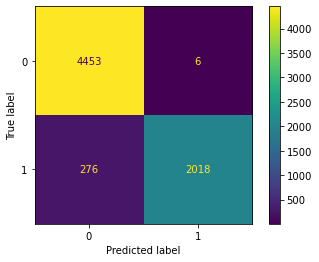

 Accuracy : 0.9582407818747224 
 Precision : 0.9970355731225297 
 Recall : 0.8796861377506539


In [18]:
confusion_matrix(y_test, y_pred_log_reg)
plot_confusion_matrix(log_reg, X_test, y_test)  
plt.show()
accuracy=accuracy_score(y_test, y_pred_log_reg)
precision=precision_score(y_test, y_pred_log_reg, zero_division=1)
recall=recall_score(y_test, y_pred_log_reg, zero_division=1)
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))

# 2) Support Vector Machines:
Linear SVM:

In [19]:
svm_clf = Pipeline((
 ("scaler", StandardScaler()),
 ("linear_svc", LinearSVC(C=1, loss="hinge")),
 ))
svm_clf.fit(X_train, y_train)


C:\Users\feras\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [20]:
y_pred_svm=svm_clf.predict(X_test)
accuracy_score(y_test, y_pred_svm)

0.9569080408707241

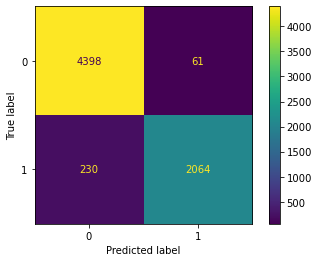

 Accuracy : 0.9569080408707241 
 Precision : 0.9712941176470589 
 Recall : 0.8997384481255449


In [21]:
confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(svm_clf, X_test, y_test)  
plt.show()
accuracy=accuracy_score(y_test, y_pred_svm)
precision=precision_score(y_test, y_pred_svm, zero_division=1)
recall=recall_score(y_test, y_pred_svm, zero_division=1)
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))

# 3) Decision Trees:

In [7]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
y_pred_tree=tree_clf.predict(X_test)
accuracy_score(y_test, y_pred_tree)

0.9552791351991707

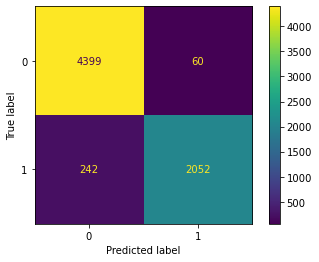

 Accuracy : 0.9552791351991707 
 Precision : 0.9715909090909091 
 Recall : 0.8945074106364429


In [9]:
confusion_matrix(y_test, y_pred_tree)
plot_confusion_matrix(tree_clf, X_test, y_test)  
plt.show()
accuracy=accuracy_score(y_test, y_pred_tree)
precision=precision_score(y_test, y_pred_tree, zero_division=1)
recall=recall_score(y_test, y_pred_tree, zero_division=1)
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))

In [ ]:
tree.plot_tree(tree_clf) 

In [ ]:
dot_data = export_graphviz(
 tree_clf,
 out_file=None,
 rounded=True,
 filled=True,
 special_characters=True
 )

In [ ]:
graph = graphviz.Source(dot_data)
graph

# 4) Random Forests

# Applying grid search for hyperparameter estimation

In [19]:
print(__doc__)
# build a classifier
bag_clf = RandomForestClassifier()
# specify parameters and distributions to sample from
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]


# run grid search
grid_search = GridSearchCV(bag_clf, param_grid=param_grid, cv=5, scoring= 'recall')
start = time()
grid_search.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
grid_search.cv_results_

Automatically created module for IPython interactive environment
GridSearchCV took 1360.82 seconds for 18 candidate parameter settings.


{'mean_fit_time': array([ 5.73429909, 10.11003714, 22.93165522,  4.40067506,  9.43256831,
        25.04147515,  4.83566136, 10.57145524, 26.40755467,  4.32792158,
        10.47201209, 27.71525354,  5.76822915, 14.16243196,  6.03166628,
        14.62174726,  5.57765965, 15.13243136]),
 'std_fit_time': array([0.70529482, 0.37847601, 0.65381055, 0.09282281, 0.47291226,
        0.49828229, 0.263942  , 0.22743402, 0.57740916, 0.06176349,
        0.20052703, 0.28864389, 0.19538661, 0.28365057, 0.29218328,
        0.33547282, 0.17296689, 0.67015626]),
 'mean_score_time': array([0.95504956, 2.07818975, 5.37901316, 0.79844294, 1.8280683 ,
        5.01150298, 0.7789186 , 1.75861664, 4.54318757, 0.70896072,
        1.65417676, 4.34191761, 1.01137323, 2.52024031, 0.96240516,
        2.41210713, 0.92842498, 2.37612996]),
 'std_score_time': array([0.02450415, 0.05958047, 0.10272385, 0.00902165, 0.07512112,
        0.12974904, 0.02758295, 0.02458735, 0.06403776, 0.03485273,
        0.02084284, 0.0502

In [20]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [21]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, max_features=4, n_estimators=10)

In [22]:
bag_clf = RandomForestClassifier(n_estimators=10, max_features= 4, bootstrap= False)
bag_clf.fit(X_train, y_train)
y_pred_random = bag_clf.predict(X_test)

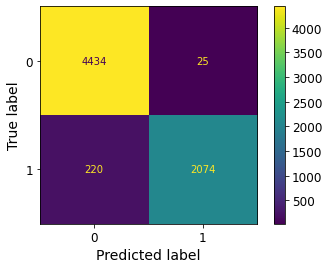

 Accuracy : 0.9637198282244929 
 Precision : 0.9880895664602192 
 Recall : 0.9040976460331299


In [23]:
confusion_matrix(y_test, y_pred_random)
plot_confusion_matrix(bag_clf, X_test, y_test)  
plt.show()
accuracy=accuracy_score(y_test, y_pred_random)
precision=precision_score(y_test, y_pred_random, zero_division=1)
recall=recall_score(y_test, y_pred_random, zero_division=1)
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))

Saving the model:

In [24]:
# Save the model as a pickle in a file 
joblib.dump(bag_clf, 'RandomForest.pkl') 
with open('myVectorizer', 'wb') as file:
    pickle.dump(vectorizer, file)

Predicting data from user:

In [17]:
# Load the model from the file 
randomForest_from_joblib = joblib.load('RandomForest.pkl')  
myvectorizer = pickle.load(open("myVectorizer", 'rb')) 

def clean_data(input_val):

    input_val=input_val.replace('\n', '')
    input_val=input_val.replace('%20', ' ')
    input_val=input_val.replace('=', ' = ')
    input_val=input_val.replace('((', ' (( ')
    input_val=input_val.replace('))', ' )) ')
    input_val=input_val.replace('(', ' ( ')
    input_val=input_val.replace(')', ' ) ')

    return input_val

def predict_sqli_attack():
    
    repeat=True
    
    space=''
    for i in range(20):
        space+= "-"

    print(space) 
    input_val=input("Please enter some data: ")
    print(space)

    
    if input_val== '0':
        repeat=False
    
    

    input_val=clean_data(input_val)
    input_val=[input_val]



    input_val=myvectorizer.transform(input_val).toarray()
    result=randomForest_from_joblib.predict(input_val)


    print(space)
    
    
    if repeat == True:
        
        if result==1:
            print("ALERT! This could be SQL injection attack!")


        elif result==0:
            print("It seems to be a benign")
            
        print(space)
            
        predict_sqli_attack()
            
    elif repeat == False:
        print( "closing ")
        

In [18]:
predict_sqli_attack()

--------------------
Please enter some data: attack
--------------------
--------------------
It seems to be a benign
--------------------
--------------------
Please enter some data: " or pg_sleep ( __TIME__ ) --
--------------------
--------------------
ALERT! This could be SQL injection attack!
--------------------
--------------------
Please enter some data: ' AND 1 = utl_inaddr.get_host_address ( ( S...
--------------------
--------------------
ALERT! This could be SQL injection attack!
--------------------
--------------------
Please enter some data: AND 1 = utl_inaddr.get_host_address ( ( S...
--------------------
--------------------
ALERT! This could be SQL injection attack!
--------------------
--------------------
Please enter some data: select this sentence but this should not be injection
--------------------
--------------------
ALERT! This could be SQL injection attack!
--------------------
--------------------
Please enter some data: in
--------------------
------------